<a href="https://colab.research.google.com/github/npl0204/Default-of-Credit-Card-Clients/blob/main/Default_of_Credit_Card_Clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading data and package

In [ ]:
# Handle Error: Pandas requires version '1.2.0' or newer of 'xlrd' (version '1.1.0' currently installed)
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math

In [ ]:
creditCard = pd.read_csv("/content/drive/MyDrive/Logistic Regression/UCI_Credit_Card.csv")

In [ ]:
creditCard.rename(columns = {"default.payment.next.month" : "default payment next month"}, inplace = True)

In [ ]:
creditCard.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
creditCard.drop("ID", axis = 1, inplace = True)

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default payment next month: Default payment (1=yes, 0=no)

## Visualization

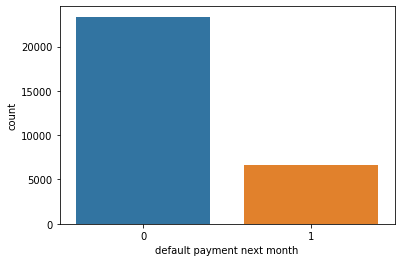

In [ ]:
sns.countplot(x = "default payment next month", data = creditCard)

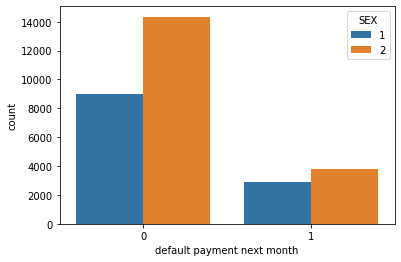

In [ ]:
sns.countplot(x = "default payment next month", hue = "SEX", data = creditCard)

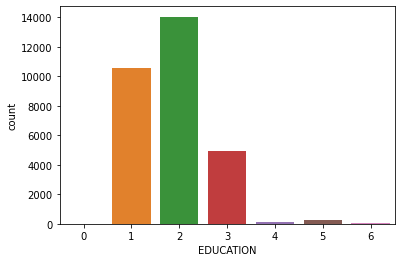

In [ ]:
sns.countplot(x = "EDUCATION", data = creditCard)

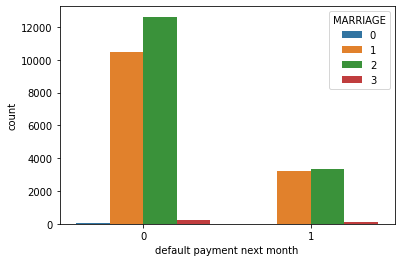

In [ ]:
sns.countplot(x = "default payment next month", hue = "MARRIAGE", data = creditCard)

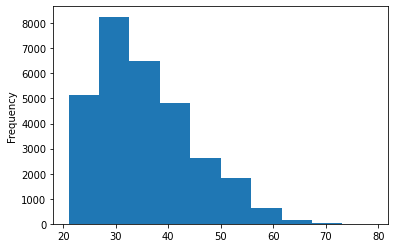

In [ ]:
creditCard["AGE"].plot.hist()

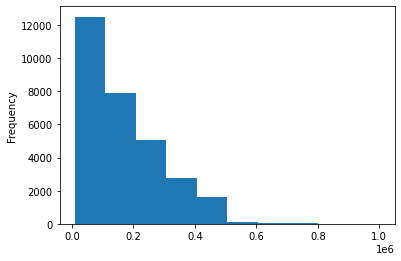

In [ ]:
creditCard["LIMIT_BAL"].plot.hist()

## Wrangling

In [ ]:
creditCard.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

1. SEX: 1 = male; 2 = female
2. EDUCATION: 1 = graduate school; 2 = university; 3 = high school; 4 = others
- Values 0, 5 and 6 are unknown. 
- Assumption: 0 = missing data; 5 and 6 = not mentioned categories.
3. MARRIAGE: 1 = married; 2 = single; 3 = others
- Values 0 is unknown. Assumption: 0 = missing data.




In [ ]:
creditCard["EDUCATION"] = np.where(creditCard["EDUCATION"] == 0, 4, creditCard["EDUCATION"])
creditCard["EDUCATION"] = np.where(creditCard["EDUCATION"] == 5, 4, creditCard["EDUCATION"])
creditCard["EDUCATION"] = np.where(creditCard["EDUCATION"] == 6, 4, creditCard["EDUCATION"])

creditCard["MARRIAGE"] = np.where(creditCard["MARRIAGE"] == 0, 3, creditCard["MARRIAGE"])

In [ ]:
creditCard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [ ]:
categorical = ['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

for i in categorical:
    creditCard[i] = creditCard[i].astype("object")

## Split set

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_curve, f1_score, confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, plot_confusion_matrix
import matplotlib.pyplot as plt
from numpy import argmax

Divide **train-validation-tuning-test** into three set **70-10-10-10** and **50-15-15-20** and **25-25-25-25**

In [ ]:
X = pd.get_dummies(creditCard.drop("default payment next month", axis = 1), columns = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"], drop_first = True)
y = creditCard["default payment next month"]

In [ ]:
# 70-10-10-10
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size = 0.1/0.9, random_state = 42, stratify = y_train1)
X_train1, X_tuning1, y_train1, y_tuning1 = train_test_split(X_train1, y_train1, test_size = 0.1/0.8, random_state = 42, stratify = y_train1)

In [ ]:
# 50-15-15-20
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size = 0.15/0.8, random_state = 42, stratify = y_train2)
X_train2, X_tuning2, y_train2, y_tuning2 = train_test_split(X_train2, y_train2, test_size = 0.15/0.65, random_state = 42, stratify = y_train2)

In [ ]:
# 25-25-25-25
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train3, y_train3, test_size = 0.25/0.75, random_state = 42, stratify = y_train3)
X_train3, X_tuning3, y_train3, y_tuning3 = train_test_split(X_train3, y_train3, test_size = 0.25/0.5, random_state = 42, stratify = y_train3)

In [ ]:
models = []
acc = []
f1 = []

## Logistic regression

### **No tuning**

In [ ]:
LR = LogisticRegression(max_iter = 10000)
LR.fit(X_train1, y_train1)

y_pred = LR.predict(X_test1)

print("accuracy =", accuracy_score(y_test1, y_pred))
print("confusion_matrix =\n", confusion_matrix(y_test1, y_pred))
print(classification_report(y_test1, y_pred))
print(f1_score(y_test1, y_pred))

accuracy = 0.7783333333333333
confusion_matrix =
 [[2335    1]
 [ 664    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2336
           1       0.00      0.00      0.00       664

    accuracy                           0.78      3000
   macro avg       0.39      0.50      0.44      3000
weighted avg       0.61      0.78      0.68      3000

0.0


In [ ]:
models.append("Simple Logistic Regression")
acc.append(accuracy_score(y_test1, y_pred))
f1.append(f1_score(y_test1, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


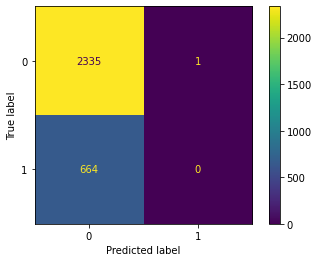

In [ ]:
plot_confusion_matrix(LR, X_test1, y_test1)

This accuracy score is not high and it is incorrect. According at the confusion matrix, it returns nearly nothing for False Positive and True Positive. This indicates that if we use the default threshold of 0.5, all of the dataset returns 0. Hence, the accuracy score is actually the proportion of 0 and 1 in dataset. In addition, F1 score is 0, meaning that the model with default threshold is a bad classifier.

Therefore, we must use tuning to find the real threshold of the data for this dataset.

### **Tuning**

In [ ]:
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype("int")

#### **Set 70-10-10-10**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)
X_tuning_scaled = scaler.transform(X_tuning1)

LR1 = LogisticRegression(max_iter = 10000)
LR1.fit(X_train_scaled, y_train1)

LogisticRegression(max_iter=10000)

Best Threshold = 0.23408253124243544, F-Score = 0.5085227272727273


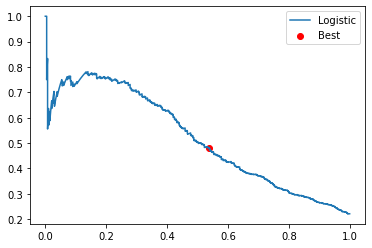

In [ ]:
predictProba = LR1.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning1, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = 'Logistic')
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [ ]:
predictProba = LR1.predict_proba(X_test_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test1, y_pred))
print("confusion matrix\n", confusion_matrix(y_test1, y_pred))
print("precision score =", precision_score(y_test1, y_pred))
print("recall score =", recall_score(y_test1, y_pred))
print("f1 score =", f1_score(y_test1, y_pred))

accuracy score = 0.7846666666666666
confusion matrix
 [[1992  344]
 [ 302  362]]
precision score = 0.5127478753541076
recall score = 0.5451807228915663
f1 score = 0.5284671532846715


In [ ]:
models.append("Tuning Logistic Regression")
acc.append(accuracy_score(y_test1, y_pred))
f1.append(f1_score(y_test1, y_pred))

#### **Set 50-15-15-20**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)
X_tuning_scaled = scaler.transform(X_tuning2)

LR2 = LogisticRegression(max_iter = 10000)
LR2.fit(X_train_scaled, y_train2)

LogisticRegression(max_iter=10000)

Best Threshold = 0.24833148481714384, F-Score = 0.5358194308145241


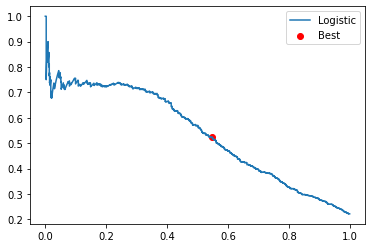

In [ ]:
predictProba = LR2.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning2, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = 'Logistic')
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [ ]:
predictProba = LR2.predict_proba(X_test_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test2, y_pred))
print("confusion matrix\n", confusion_matrix(y_test2, y_pred))
print("precision score =", precision_score(y_test2, y_pred))
print("recall score =", recall_score(y_test2, y_pred))
print("f1 score =", f1_score(y_test2, y_pred))

accuracy score = 0.7856666666666666
confusion matrix
 [[4021  652]
 [ 634  693]]
precision score = 0.5152416356877323
recall score = 0.5222305953278071
f1 score = 0.5187125748502995


#### **Set 25-25-25-25**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train3)
X_test_scaled = scaler.transform(X_test3)
X_tuning_scaled = scaler.transform(X_tuning3)

LR3 = LogisticRegression(max_iter = 10000)
LR3.fit(X_train_scaled, y_train3)

LogisticRegression(max_iter=10000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


Best Threshold = 0.2697494938556633, F-Score = 0.5268383493639467


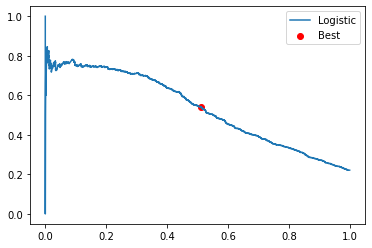

In [ ]:
predictProba = LR3.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning3, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = 'Logistic')
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [ ]:
predictProba = LR3.predict_proba(X_test_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test3, y_pred))
print("confusion matrix\n", confusion_matrix(y_test3, y_pred))
print("precision score =", precision_score(y_test3, y_pred))
print("recall score =", recall_score(y_test3, y_pred))
print("f1 score =", f1_score(y_test3, y_pred))

accuracy score = 0.7890666666666667
confusion matrix
 [[5055  786]
 [ 796  863]]
precision score = 0.5233474833232262
recall score = 0.5201928872814949
f1 score = 0.5217654171704957


## SVM

#### **Set 70-10-10-10**

- Feature scaling is mapping the feature values of a dataset into the same range. Feature scaling is crucial for some machine learning algorithms, which consider distances between observations because the distance between two observations differs for non-scaled and scaled cases.
- The distance between data points affects the decision boundary SVM chooses. In other words, training an SVM over the scaled and non-scaled data leads to the generation of different models.

fit_transform() method on training data and transform() method on test data.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)
X_tuning_scaled = scaler.transform(X_tuning1)

SVM1 = SVC(random_state = 42, probability = True)
SVM1.fit(X_train_scaled, y_train1)

SVC(probability=True, random_state=42)

Best Threshold = 0.1584079590456963, F-Score = 0.4988198269079465


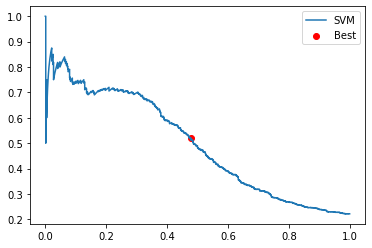

In [ ]:
predictProba = SVM1.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning1, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = "SVM")
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [ ]:
predictProba = SVM1.predict_proba(X_test_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test1, y_pred))
print("confusion matrix\n", confusion_matrix(y_test1, y_pred))
print("precision score =", precision_score(y_test1, y_pred))
print("recall score =", recall_score(y_test1, y_pred))
print("f1 score =", f1_score(y_test1, y_pred))

accuracy score = 0.783
confusion matrix
 [[2029  307]
 [ 344  320]]
precision score = 0.5103668261562998
recall score = 0.4819277108433735
f1 score = 0.49573973663826487


#### **Set 50-15-15-20**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)
X_tuning_scaled = scaler.transform(X_tuning2)

SVM2 = SVC(random_state = 42, probability = True)
SVM2.fit(X_train_scaled, y_train2)

SVC(probability=True, random_state=42)

Best Threshold = 0.15848114619322365, F-Score = 0.5137362637362637


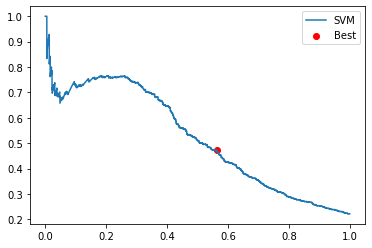

In [ ]:
predictProba = SVM2.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning2, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = "SVM")
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [ ]:
predictProba = SVM2.predict_proba(X_test_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test2, y_pred))
print("confusion matrix\n", confusion_matrix(y_test2, y_pred))
print("precision score =", precision_score(y_test2, y_pred))
print("recall score =", recall_score(y_test2, y_pred))
print("f1 score =", f1_score(y_test2, y_pred))

accuracy score = 0.7531666666666667
confusion matrix
 [[3804  869]
 [ 612  715]]
precision score = 0.4513888888888889
recall score = 0.5388093443858327
f1 score = 0.4912401236688423


#### **Set 25-25-25-25**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train3)
X_test_scaled = scaler.transform(X_test3)
X_tuning_scaled = scaler.transform(X_tuning3)

SVM3 = SVC(random_state = 42, probability = True)
SVM3.fit(X_train_scaled, y_train3)

SVC(probability=True, random_state=42)

Best Threshold = 0.1688700556920857, F-Score = 0.48810333106730114


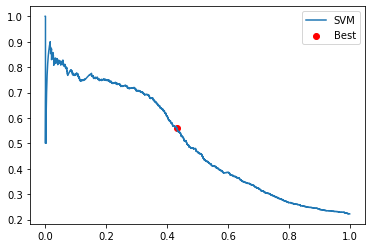

In [ ]:
predictProba = SVM3.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning3, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = "SVM")
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [ ]:
predictProba = SVM3.predict_proba(X_test_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test3, y_pred))
print("confusion matrix\n", confusion_matrix(y_test3, y_pred))
print("precision score =", precision_score(y_test3, y_pred))
print("recall score =", recall_score(y_test3, y_pred))
print("f1 score =", f1_score(y_test3, y_pred))

accuracy score = 0.7969333333333334
confusion matrix
 [[5234  607]
 [ 916  743]]
precision score = 0.5503703703703704
recall score = 0.4478601567209162
f1 score = 0.4938517779993354


#### **Set 10-10-10-70**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)
X_tuning_scaled = scaler.transform(X_tuning1)

SVM4 = SVC(random_state = 42, probability = True)
SVM4.fit(X_test_scaled, y_test1)

SVC(probability=True, random_state=42)

Best Threshold = 0.17596788701376329, F-Score = 0.5078864353312302


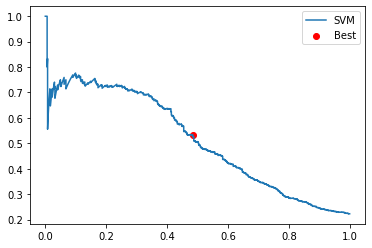

In [ ]:
predictProba = SVM4.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning1, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = "SVM")
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [ ]:
predictProba = SVM4.predict_proba(X_train_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_train1, y_pred))
print("confusion matrix\n", confusion_matrix(y_train1, y_pred))
print("precision score =", precision_score(y_train1, y_pred))
print("recall score =", recall_score(y_train1, y_pred))
print("f1 score =", f1_score(y_train1, y_pred))

accuracy score = 0.7865714285714286
confusion matrix
 [[14336  2020]
 [ 2462  2182]]
precision score = 0.5192765349833413
recall score = 0.4698535745047373
f1 score = 0.49333031878815287


#### **Set 20-15-15-50**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)
X_tuning_scaled = scaler.transform(X_tuning2)

SVM5 = SVC(random_state = 42, probability = True)
SVM5.fit(X_test_scaled, y_test2)

SVC(probability=True, random_state=42)

Best Threshold = 0.1698750376904834, F-Score = 0.5047248471372986


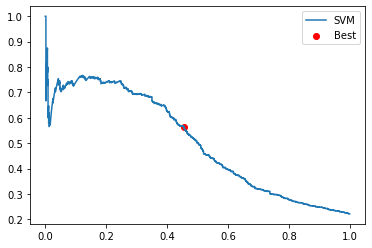

In [ ]:
predictProba = SVM5.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning2, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = "SVM")
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [ ]:
predictProba = SVM5.predict_proba(X_train_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_train2, y_pred))
print("confusion matrix\n", confusion_matrix(y_train2, y_pred))
print("precision score =", precision_score(y_train2, y_pred))
print("recall score =", recall_score(y_train2, y_pred))
print("f1 score =", f1_score(y_train2, y_pred))

accuracy score = 0.7963333333333333
confusion matrix
 [[10418  1264]
 [ 1791  1527]]
precision score = 0.5471157291293444
recall score = 0.4602169981916817
f1 score = 0.49991815354395164


In [ ]:
models.append("SVM")
acc.append(accuracy_score(y_train2, y_pred))
f1.append(f1_score(y_train2, y_pred))

#### SVM knowledge

**SVM** Support Vector Machine

- To put the boundary as far as possible from any of the observations.
- SVM solution gives the best possible separation between classes that is the widest margin without unnecessary misclassifications.
- Linear boundaries between classes are not appropriate for all problems. However, SVM’s can still be used on nonlinear classification problems by performing a transformation of variables into space, where the classes are linearly separable the linear boundary in that space is equivalent to a non-linear boundary.

## XGboost

In [ ]:
import xgboost as xgb

#### **Set 70-10-10-10**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)
X_tuning_scaled = scaler.transform(X_tuning1)

XGB1 = xgb.XGBClassifier()
XGB1.fit(X_train_scaled, y_train1)

XGBClassifier()

Best Threshold = 0.2911171317100525, F-Score = 0.5253595760787282


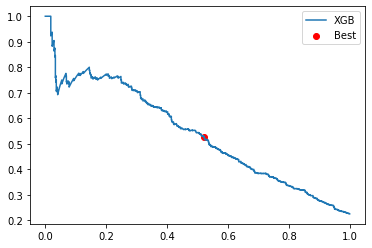

In [ ]:
predictProba = XGB1.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning1, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = "XGB")
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [ ]:
predictProba = XGB1.predict_proba(X_test_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test1, y_pred))
print("confusion matrix\n", confusion_matrix(y_test1, y_pred))
print("precision score =", precision_score(y_test1, y_pred))
print("recall score =", recall_score(y_test1, y_pred))
print("f1 score =", f1_score(y_test1, y_pred))

accuracy score = 0.8033333333333333
confusion matrix
 [[2055  281]
 [ 309  355]]
precision score = 0.5581761006289309
recall score = 0.5346385542168675
f1 score = 0.5461538461538462


In [ ]:
models.append("XGBoost")
acc.append(accuracy_score(y_test1, y_pred))
f1.append(f1_score(y_test1, y_pred))

#### **Set 50-15-15-20**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)
X_tuning_scaled = scaler.transform(X_tuning2)

XGB2 = xgb.XGBClassifier()
XGB2.fit(X_train_scaled, y_train2)

XGBClassifier()

Best Threshold = 0.2567102909088135, F-Score = 0.5481758652946679


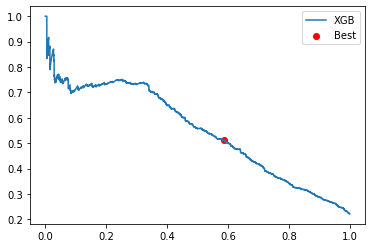

In [ ]:
predictProba = XGB2.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning2, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = "XGB")
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [ ]:
predictProba = XGB2.predict_proba(X_test_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test2, y_pred))
print("confusion matrix\n", confusion_matrix(y_test2, y_pred))
print("precision score =", precision_score(y_test2, y_pred))
print("recall score =", recall_score(y_test2, y_pred))
print("f1 score =", f1_score(y_test2, y_pred))

accuracy score = 0.7861666666666667
confusion matrix
 [[3953  720]
 [ 563  764]]
precision score = 0.5148247978436657
recall score = 0.5757347400150716
f1 score = 0.5435787975809321


#### **Set 25-25-25-25**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train3)
X_test_scaled = scaler.transform(X_test3)
X_tuning_scaled = scaler.transform(X_tuning3)

XGB3 = xgb.XGBClassifier()
XGB3.fit(X_train_scaled, y_train3)

XGBClassifier()

Best Threshold = 0.2431003451347351, F-Score = 0.5375383756628523


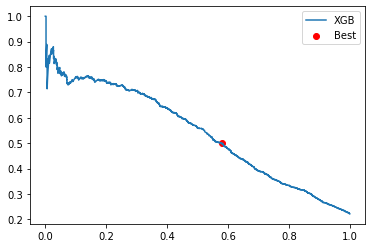

In [ ]:
predictProba = XGB3.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning3, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = "XGB")
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [ ]:
predictProba = XGB3.predict_proba(X_test_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test3, y_pred))
print("confusion matrix\n", confusion_matrix(y_test3, y_pred))
print("precision score =", precision_score(y_test3, y_pred))
print("recall score =", recall_score(y_test3, y_pred))
print("f1 score =", f1_score(y_test3, y_pred))

accuracy score = 0.7762666666666667
confusion matrix
 [[4817 1024]
 [ 654 1005]]
precision score = 0.49531789058649583
recall score = 0.6057866184448463
f1 score = 0.5450108459869848


#### **Set 10-10-10-70**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)
X_tuning_scaled = scaler.transform(X_tuning1)

XGB4 = xgb.XGBClassifier()
XGB4.fit(X_test_scaled, y_test1)

XGBClassifier()

Best Threshold = 0.3151269555091858, F-Score = 0.5182829888712243


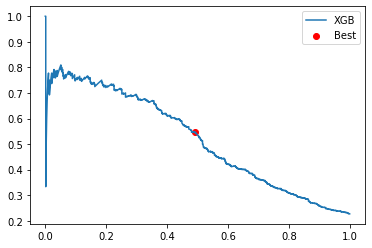

In [ ]:
predictProba = XGB4.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning1, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = "XGB")
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [ ]:
predictProba = XGB4.predict_proba(X_train_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_train1, y_pred))
print("confusion matrix\n", confusion_matrix(y_train1, y_pred))
print("precision score =", precision_score(y_train1, y_pred))
print("recall score =", recall_score(y_train1, y_pred))
print("f1 score =", f1_score(y_train1, y_pred))

accuracy score = 0.7967142857142857
confusion matrix
 [[14401  1955]
 [ 2314  2330]]
precision score = 0.543757292882147
recall score = 0.5017226528854436
f1 score = 0.5218949490424459


#### **Set 20-15-15-50**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)
X_tuning_scaled = scaler.transform(X_tuning2)

XGB5 = xgb.XGBClassifier()
XGB5.fit(X_test_scaled, y_test2)

XGBClassifier()

Best Threshold = 0.2622922956943512, F-Score = 0.5436272270443125


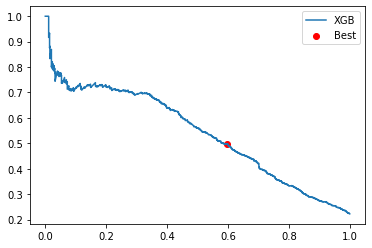

In [ ]:
predictProba = XGB5.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning2, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = "XGB")
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [ ]:
predictProba = XGB5.predict_proba(X_train_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_train2, y_pred))
print("confusion matrix\n", confusion_matrix(y_train2, y_pred))
print("precision score =", precision_score(y_train2, y_pred))
print("recall score =", recall_score(y_train2, y_pred))
print("f1 score =", f1_score(y_train2, y_pred))

accuracy score = 0.7798
confusion matrix
 [[9758 1924]
 [1379 1939]]
precision score = 0.5019414962464406
recall score = 0.5843881856540084
f1 score = 0.5400362066564545


## Neural Network Regression

#### Define Network

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler

* Number of input nodes: the number of neurons comprising that layer is equal to the number of features (columns)
* Number of output nodes: 
> If the NN is a regressor, then the output layer has a single node. If the NN is a classifier, then it also has a single node unless softmax is used in which case the output layer has one node per class label in your model.

In [ ]:
# number of features (len of X cols)
input_dim = len(X.columns)
# number of classes (unique of y)
output_dim = 1 # one output node for regression model

class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.Sigmoid = nn.Sigmoid()
        self.ReLU = nn.ReLU(inplace = True)
        self.Dropout = nn.Dropout(0.4)
        
        # input >> hidden 1
        self.linear = nn.Linear(input_dim, round(1.5*input_dim))
        
        # hidden 1 >> hidden 2
        self.linear2 = nn.Linear(round(1.5*input_dim), round(input_dim/0.5))

        # hidden 2 >> output
        self.linear3 = nn.Linear(round(input_dim/0.5), output_dim)
        
    def forward(self, input, train=False):
        if train:
            input = self.Dropout(input)
        sig1 = self.ReLU(self.linear(input))
        if train:
            sig1 = self.Dropout(sig1)
        sig2 = self.ReLU(self.linear2(sig1))
        if train:
            sig2 = self.Dropout(sig2)
        y = self.Sigmoid(self.linear3(sig2))
        return y

In [ ]:
device = torch.device("cpu")
class dataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        if not torch.is_tensor(X) and not torch.is_tensor(y.values):
            self.X = torch.tensor(X, dtype=torch.float32).to(device)
            self.y = torch.tensor(y.values, dtype=torch.float32).to(device)

    def __len__(self):
        return len(self.X)

    def getitem(self):
        return self.X, self.y

In [ ]:
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).long()

#### Build Model

In [ ]:
import pickle

network = net()
network.to(torch.device("cpu"))

scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train1)
X_tuning1 = scaler.transform(X_tuning1)
X_test1 = scaler.transform(X_test1)

X_train1, y_train1 = dataset(X_train1, y_train1).getitem()
X_tuning1, y_tuning1 = dataset(X_tuning1, y_tuning1).getitem()
X_test1, y_test1 = dataset(X_test1, y_test1).getitem()

y_train1 = y_train1.unsqueeze(1) # change dimension
y_tuning1 = y_tuning1.unsqueeze(1)
y_test1 = y_test1.unsqueeze(1)

if __name__ == '__main__':

    epochs = 500 # 2000,5000,10000
    lr = 0.001 # 0.15 0.10 0.05

    floss = nn.MSELoss() 

    optimizer = torch.optim.Adam(network.parameters(), lr = lr) 
    current_loss = 0 
    plot_every = 10 

    all_losses = [] 
    f1_train = []
    f1_tun = []

    best_max_F1_train = 0
    best_max_F1_tun = 0

    for epoch in range(epochs): 
        yhat = network.forward(X_train1, train=True)

        # calculate MSE loss   
        loss = floss(yhat, y_train1)
        
        # backpropogate through the loss gradiants   
        loss.backward()
        
        # update model weights   
        optimizer.step()
        
        # remove current gradients for next iteration   
        optimizer.zero_grad() 
    
        # append to loss   
        current_loss += loss  

        if epoch % plot_every == 0:       
            with torch.no_grad():

                #training
                yhat = network.forward(X_train1).detach()
                precision, recall, thresholds = precision_recall_curve(y_train1, yhat)
                F1_score_train = []
                for i in range(len(precision)):
                    if precision[i] + recall[i] == 0:
                        F1_score_train.append(0)
                    else:
                        F1_score_train.append((2 * precision[i] * recall[i])/(precision[i] + recall[i]))
                max_F1_score_train = max(F1_score_train)
                f1_train.append(max_F1_score_train)

                # tuning 
                yhat_tuning = network.forward(X_tuning1).detach()
                precision, recall, thresholds = precision_recall_curve(y_tuning1, yhat_tuning)
                F1_score_tun = []
                for i in range(len(precision)):
                    if precision[i] + recall[i] == 0:
                        F1_score_tun.append(0)
                    else:
                        F1_score_tun.append((2 * precision[i] * recall[i])/(precision[i] + recall[i]))
                max_F1_score_tun = max(F1_score_tun)
                f1_tun.append(max_F1_score_tun)

                # Store the best threshold and best model
                if max_F1_score_train >= best_max_F1_train and max_F1_score_tun > best_max_F1_tun:
                    best_max_F1_train = max_F1_score_train
                    best_max_F1_tun = max_F1_score_tun
                    best_th = thresholds[argmax(F1_score_tun)]
                    # save...
                    file = open('best_network.pkl', 'wb')
                    pickle.dump(network, file)

                all_losses.append(loss.detach().numpy())
        
        # print progress   
        if epoch % (epochs/10) == 0:     
            print('10th-epoch =', epoch, 'loss =', loss, 'max(f1) tuning =', max_F1_score_tun, 'max(f1) train =', max_F1_score_train)
file.close()

10th-epoch = 0 loss = tensor(0.2506, grad_fn=<MseLossBackward0>) max(f1) tuning = 0.36244541484716153 max(f1) train = 0.36221823570704315
10th-epoch = 50 loss = tensor(0.1467, grad_fn=<MseLossBackward0>) max(f1) tuning = 0.5123309466984884 max(f1) train = 0.5330944350758854
10th-epoch = 100 loss = tensor(0.1416, grad_fn=<MseLossBackward0>) max(f1) tuning = 0.518575851393189 max(f1) train = 0.541188524590164
10th-epoch = 150 loss = tensor(0.1415, grad_fn=<MseLossBackward0>) max(f1) tuning = 0.5206106870229008 max(f1) train = 0.5462159736763387
10th-epoch = 200 loss = tensor(0.1412, grad_fn=<MseLossBackward0>) max(f1) tuning = 0.5207547169811321 max(f1) train = 0.5488073762277009
10th-epoch = 250 loss = tensor(0.1400, grad_fn=<MseLossBackward0>) max(f1) tuning = 0.5220165922144224 max(f1) train = 0.5498674281052416
10th-epoch = 300 loss = tensor(0.1404, grad_fn=<MseLossBackward0>) max(f1) tuning = 0.5228276877761414 max(f1) train = 0.550997442455243
10th-epoch = 350 loss = tensor(0.1399,

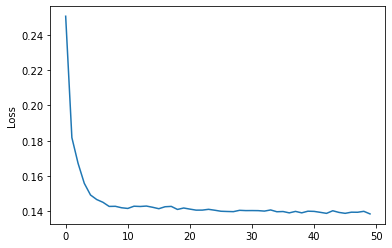

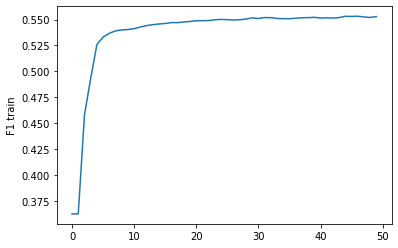

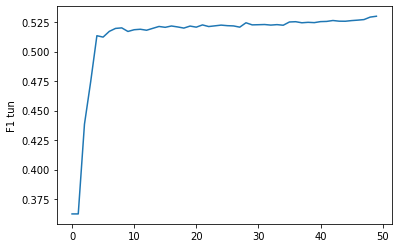

best F1 tuning =  0.526706231454006
best F1 training =  0.5532002469643961


In [ ]:
import matplotlib.pyplot as plt

plt.plot(all_losses)
plt.ylabel('Loss')
plt.show()

plt.plot(f1_train)
plt.ylabel('F1 train')
plt.show()

plt.plot(f1_tun)
plt.ylabel('F1 tun')
plt.show()

print("best F1 tuning = ", best_max_F1_tun)
print("best F1 training = ", best_max_F1_train)

In [ ]:
print("best threshold = ", best_th)

# load...
file = open('best_network.pkl', 'rb')
network = pickle.load(file)
y_pred = to_labels(network.forward(X_test1), best_th)

print("accuracy score =", accuracy_score(y_test1, y_pred))
print("confusion matrix\n", confusion_matrix(y_test1, y_pred))
print("precision score =", precision_score(y_test1, y_pred))
print("recall score =", recall_score(y_test1, y_pred))
print("f1 score =", f1_score(y_test1, y_pred))

file.close()

best threshold =  0.28988653
accuracy score = 0.799
confusion matrix
 [[2038  298]
 [ 305  359]]
precision score = 0.5464231354642314
recall score = 0.5406626506024096
f1 score = 0.5435276305828917


In [ ]:
models.append("Neural Network")
acc.append(accuracy_score(y_test1, y_pred))
f1.append(f1_score(y_test1, y_pred))

## Comparing Models

In [ ]:
comparison = pd.DataFrame({'Model': models, 'Accuracy': acc, 'F1 Score': f1})
comparison

,Model,Accuracy,F1 Score
0,Simple Logistic Regression,0.778333,0.000000
1,Tuning Logistic Regression,0.784667,0.528467
2,SVM,0.796333,0.499918
3,XGBoost,0.803333,0.546154
4,Neural Network,0.799000,0.543528
